# **Clustering**

# Clustering Question/ Answers:

1. What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

 | Aspect             | K-Means                       | Hierarchical                     |
| ------------------ | ----------------------------- | -------------------------------- |
| Number of clusters | Must be predefined            | Not required initially           |
| Output             | Flat clusters                 | Tree structure (dendrogram)      |
| Scalability        | Very efficient for large data | Slower for large data            |
| Sensitivity        | Sensitive to outliers         | Less sensitive to initialization |
| Interpretability   | Less interpretable            | Highly interpretable             |

### *Use Cases:*

* ***K-Means:*** Customer segmentation in e-commerce where the number of customer groups is known in advance.
* ***Hierarchical Clustering:*** Gene expression analysis or document clustering where relationships between clusters are important.

2. Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.
    - The ***Silhouette Score*** is a metric used to evaluate the *quality of clustering* by measuring how well each data point fits within its assigned cluster compared to other clusters.

It considers:

* ***Cohesion:*** How close a data point is to other points in the same cluster.
* ***Separation:*** How far a data point is from points in other clusters.

The Silhouette Score ranges from *–1 to +1*:

* *+1:* Data point is well clustered.
* *0:* Data point lies between clusters.
* *-1:* Data point may be assigned to the wrong cluster.

### *Purpose of Silhouette Score:*

* To ***compare different clustering algorithms***
* To ***determine the optimal number of clusters***
* To ***validate cluster quality without labeled data***

A ***higher Silhouette Score*** indicates better-defined and well-separated clusters.


3. What are the core parameters of DBSCAN, and how do they influence the
clustering process?
    - ***DBSCAN (Density-Based Spatial Clustering of Applications with Noise)*** mainly depends on ***two core parameters***:

### *1. eps (Epsilon)*

* Defines the ***maximum distance*** between two points to be considered neighbors.
* Controls the ***density threshold***.
* ***Small eps*** → More points labeled as noise, smaller clusters
* ***Large eps*** → Fewer clusters, may merge different clusters

### *2. min_samples*

* Minimum number of points required within eps radius to form a ***dense region***.
* Determines whether a point is a ***core point***.
* ***Higher min_samples*** → Stricter clustering, more noise
* ***Lower min_samples*** → More clusters, may include noise as clusters

### *Effect on Clustering*

* Core points form clusters.
* Border points belong to clusters but have fewer neighbors.
* Noise points are labeled as ***-1***.

4. Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?
     ### ***Importance of Feature Scaling***

     Clustering algorithms rely on *distance calculations*, so features with larger values can dominate the clustering result.

### *For K-Means*

* Uses ***Euclidean distance*** to assign points to clusters.
* If features are on different scales (e.g., age vs income), larger-scale features dominate.
* Scaling ensures ***equal contribution of all features***.

### *For DBSCAN*

* Density is determined using distance (eps).
* Without scaling, eps becomes meaningless.
* Scaling improves ***accurate density estimation***.

### *Benefits of Feature Scaling*

* Improves cluster quality
* Prevents biased clustering
* Makes distance-based parameters meaningful
* Ensures stable and reliable results

### *Common Scaling Methods*
* ***StandardScaler*** (mean = 0, std = 1)
* ***MinMaxScaler*** (range 0 to 1)


5. What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

     **Dataset:**
     Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
     specified.

      - The ***Elbow Method*** is a ***heuristic technique*** used to determine the *optimal number of clusters (K)* in ***K-Means clustering***.

K-Means clustering minimizes the *Within-Cluster Sum of Squares (WCSS), also known as **inertia*, which measures how close data points are to their cluster centroids.

### *How the Elbow Method Works:*

1. Run K-Means for a range of K values (e.g., K = 1 to 10).
2. Calculate the WCSS for each K.
3. Plot K vs WCSS.
4. Identify the point where the decrease in WCSS slows down sharply — this point looks like an ***“elbow”***.
5. The K at the elbow point is considered the *optimal number of clusters*.

### *Why it works:*

* For small K, adding clusters significantly reduces WCSS.
* After a certain K, adding more clusters gives ***diminishing returns***.
* The elbow represents a balance between ***model simplicity*** and ***cluster accuracy***



### *1️⃣ Elbow Method using make_blobs*

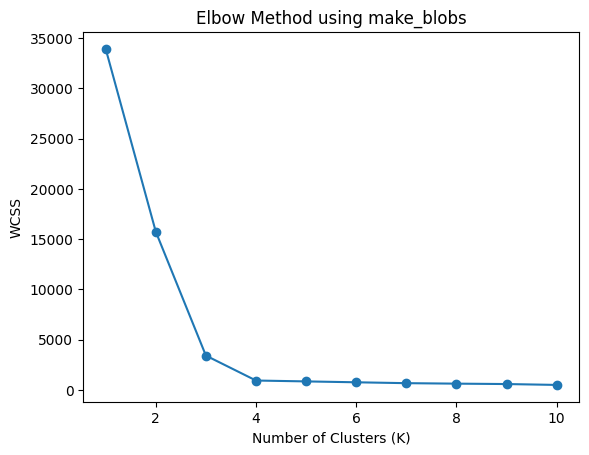

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate dataset
X, _ = make_blobs(n_samples=500, centers=4, random_state=42)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method using make_blobs")
plt.show()

### *2️⃣ Elbow Method using make_moons*

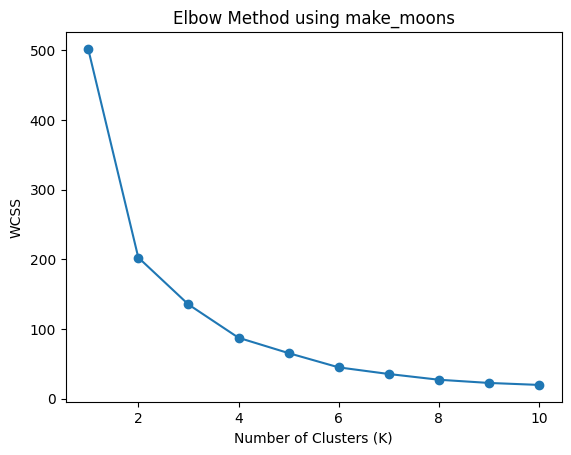

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate non-linear dataset
X, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method using make_moons")
plt.show()

### *3️⃣ Elbow Method using load_wine() dataset*

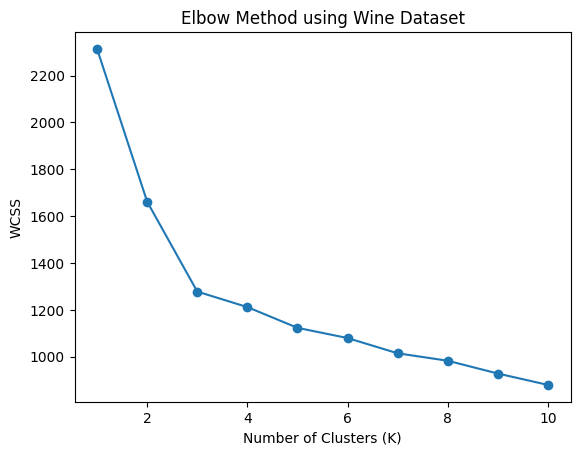

In [ ]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
wine = load_wine()
X = wine.data

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method using Wine Dataset")
plt.show()

6. Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.

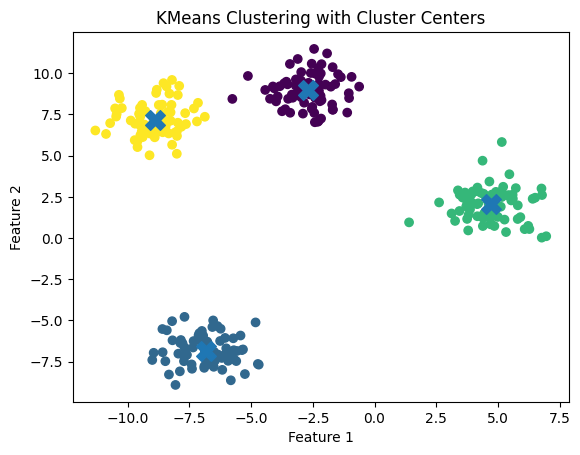

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot clusters and centroids
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='X', s=200)
plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### *Explanation*

* make_blobs creates artificial clustered data.
* KMeans groups data into 4 clusters.
* Cluster centers are highlighted in the scatter plot.

7.  Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).
     
     

In [5]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)

Number of clusters found (excluding noise): 0


### *Explanation*

* DBSCAN identifies clusters based on density.
* Noise points are labeled as *-1*.
* Number of clusters = unique labels excluding -1.


8. Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.


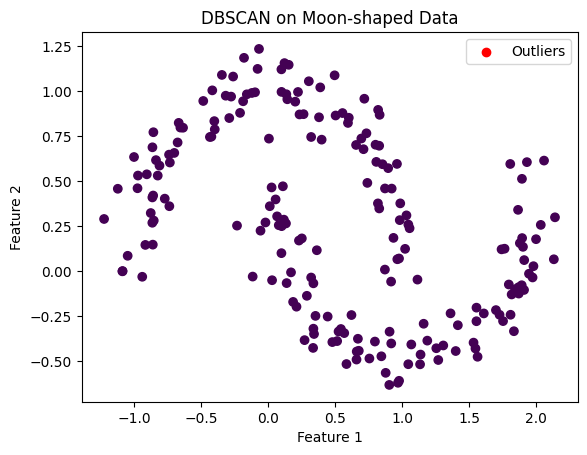

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot clusters and outliers
plt.figure()
plt.scatter(X[labels != -1, 0], X[labels != -1, 1], c=labels[labels != -1])
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='red', label='Outliers')
plt.title("DBSCAN on Moon-shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### *Explanation*

* make_moons creates non-linear data.
* DBSCAN works well for such shapes.
* Noise points (-1) are shown in a different color.

9. Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.


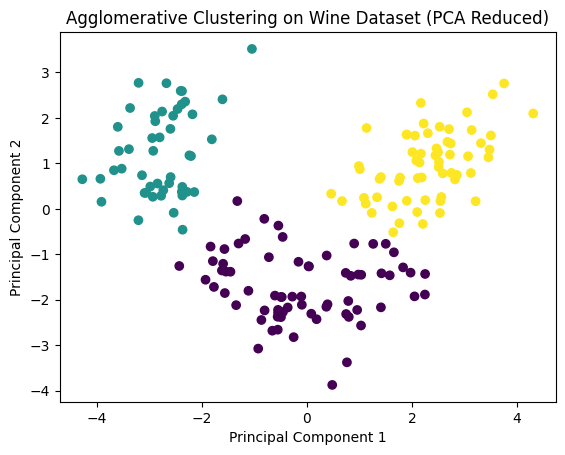

In [7]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
clusters = agglo.fit_predict(X_pca)

# Visualize the clusters
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced)")
plt.show()


### *Explanation*

* We load the Wine dataset from sklearn.
* Features are standardized because PCA and clustering are distance-based.
* PCA reduces the data from 13 features to *2 principal components*.
* Agglomerative Clustering groups the data into *3 clusters* (same as wine classes).
* A scatter plot visualizes the clusters in 2D.


10. You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

### ***Customer Segmentation using Clustering – Real-World Workflow***

#### *1. **Clustering Algorithm(s) and Why**

* *K-Means*

  * Efficient for large datasets
  * Easy to interpret customer segments
* *Hierarchical Clustering*

  * Useful for understanding customer hierarchy
* *DBSCAN* (optional)

  * Detects outliers and unusual customers

➡️ *Primary choice:* K-Means (scalable and marketing-friendly)

---

#### ***2. Data Preprocessing***

* *Missing Values*

  * Numerical → Mean/Median imputation
  * Categorical → Mode or “Unknown”
* *Scaling*
* Use *StandardScaler* or *MinMaxScaler*
  * Required because purchase amounts and age are on different scales
* *Encoding*

  * One-Hot Encoding for categorical variables
* *Feature Engineering*

  * Total spend, frequency of purchase, recency, category-wise spend

---

#### ***3. Determining the Number of Clusters***

* *Elbow Method*

  * Find point where WCSS stops decreasing sharply
* *Silhouette Score*

  * Measures cluster quality
* *Business Understanding*
* Marketing teams usually prefer *4–6 actionable segments*

---

#### ***4. Benefits to the Marketing Team***

* Personalized promotions for each customer group
* Improved customer retention
* Better targeting (high-value vs low-value customers)
* Efficient marketing budget allocation
* Increased conversion rates and revenue
